## Breast Cancer Part 1 and 2

## Project Description

The brca dataset from the dslabs package contains information about breast cancer diagnosis biopsy samples for tumors that were determined to be either benign (not cancer) and malignant (cancer). The brca object is a list consisting of:

brca$y: a vector of sample classifications ("B" = benign or "M" = malignant)

brca$x: a matrix of numeric features describing properties of the shape and size of cell nuclei extracted from biopsy microscope images

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

import datetime
from datetime import datetime, timedelta

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA

#from pycaret.clustering import *

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("brca.csv")

In [3]:
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.54,14.36,87.46,566.30,0.10,0.08,0.07,0.05,0.19,0.06,0.27,0.79,2.06,23.56,0.01,0.01,0.02,0.01,0.02,0.00,15.11,19.26,99.70,711.20,0.14,0.18,0.24,0.13,0.30,0.07,B
1,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,0.19,0.75,1.38,14.67,0.00,0.02,0.02,0.01,0.02,0.00,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08,B
2,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,0.07,0.28,0.98,1.91,15.70,0.01,0.01,0.02,0.01,0.02,0.00,10.23,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08,B
3,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,0.18,2.34,1.17,14.16,0.00,0.00,0.01,0.01,0.03,0.00,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06,B
4,8.20,16.84,51.71,201.90,0.09,0.06,0.02,0.01,0.18,0.07,0.16,0.96,1.09,8.21,0.01,0.02,0.02,0.01,0.03,0.00,8.96,21.96,57.26,242.20,0.13,0.14,0.07,0.03,0.31,0.07,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.92,25.09,143.00,1347.00,0.11,0.22,0.32,0.15,0.21,0.07,0.96,1.03,8.76,118.80,0.01,0.04,0.08,0.03,0.02,0.01,24.29,29.41,179.10,1819.00,0.14,0.42,0.66,0.25,0.29,0.10,M
565,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,M
566,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,M
567,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [5]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [6]:
df.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se', 'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se', 'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst', 'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst', 'x.fractal_dim_worst', 'y'], dtype='object')

q1a - how many samples and predictors

q1b - proportion of malignant samples

In [7]:
df.y.value_counts()

B    357
M    212
Name: y, dtype: int64

q1c - which column number has the highest mean

q1d - which column number has the lowest sd

q2a - what is the sd of the first column

q2b - what is the median of the first column

q3a - what is the average distance between the first sample and benign samples

q3b - what is the average distance between the first sample and malignant samples

q4 - make a heatmap of the relationship between features using the scaled matrix

In [8]:
le = LabelEncoder()

In [9]:
df["y"] = le.fit_transform(df["y"])

In [10]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.54,14.36,87.46,566.30,0.10,0.08,0.07,0.05,0.19,0.06,0.27,0.79,2.06,23.56,0.01,0.01,0.02,0.01,0.02,0.00,15.11,19.26,99.70,711.20,0.14,0.18,0.24,0.13,0.30,0.07,0
1,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,0.19,0.75,1.38,14.67,0.00,0.02,0.02,0.01,0.02,0.00,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08,0
2,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,0.07,0.28,0.98,1.91,15.70,0.01,0.01,0.02,0.01,0.02,0.00,10.23,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08,0
3,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,0.18,2.34,1.17,14.16,0.00,0.00,0.01,0.01,0.03,0.00,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06,0
4,8.20,16.84,51.71,201.90,0.09,0.06,0.02,0.01,0.18,0.07,0.16,0.96,1.09,8.21,0.01,0.02,0.02,0.01,0.03,0.00,8.96,21.96,57.26,242.20,0.13,0.14,0.07,0.03,0.31,0.07,0


In [11]:
df.shape

(569, 31)

In [12]:
X = df.iloc[:,0:30]
y = df.iloc[:,30]

In [13]:
X.values, y.values

(array([[ 13.54   ,  14.36   ,  87.46   , ...,   0.1288 ,   0.2977 ,
           0.07259],
        [ 13.08   ,  15.71   ,  85.63   , ...,   0.07283,   0.3184 ,
           0.08183],
        [  9.504  ,  12.44   ,  60.34   , ...,   0.06227,   0.245  ,
           0.07773],
        ...,
        [ 20.13   ,  28.25   , 131.2    , ...,   0.1628 ,   0.2572 ,
           0.06637],
        [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
           0.0782 ],
        [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
           0.124  ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

### Train Test Split

q9 - check the proportions of the train and test sets

q9a - what is the proportion of benign in the train set

q9b - what is the proportion of benign in the test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Standardize all values

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled, X_test_scaled

(array([[-0.08334017,  0.34359663, -0.10079884, ..., -0.71497057,
         -1.06894268,  0.04035096],
        [ 1.08862799,  0.18442976,  0.91733362, ...,  0.04450911,
          3.36160303, -1.26498561],
        [ 0.17805469,  1.09098888,  0.21718523, ...,  0.69549169,
          0.73491034,  0.2700595 ],
        ...,
        [ 1.58843795,  0.47046877,  1.57580652, ...,  1.93372429,
          1.22625836,  0.18618025],
        [-0.71815626, -0.49375951, -0.77052412, ..., -1.10692582,
         -0.2578819 , -0.87354911],
        [ 3.00743861,  0.55120559,  3.05528675, ...,  2.00200917,
          0.45894775,  0.6867146 ]]),
 array([[ 1.32417062,  0.51199056,  1.27991047, ...,  1.35406148,
          1.33731648,  0.79581245],
        [-0.11206488,  0.71037246, -0.06495791, ...,  0.78502076,
          0.32937995,  0.50141272],
        [-0.67794166, -0.60679105, -0.55006072, ...,  1.07636961,
          4.86257027,  1.03155152],
        ...,
        [ 1.61716266,  1.36318729,  1.59247672, ...,  

q5 - perform heirarchical clustering, cut the tree into 5

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

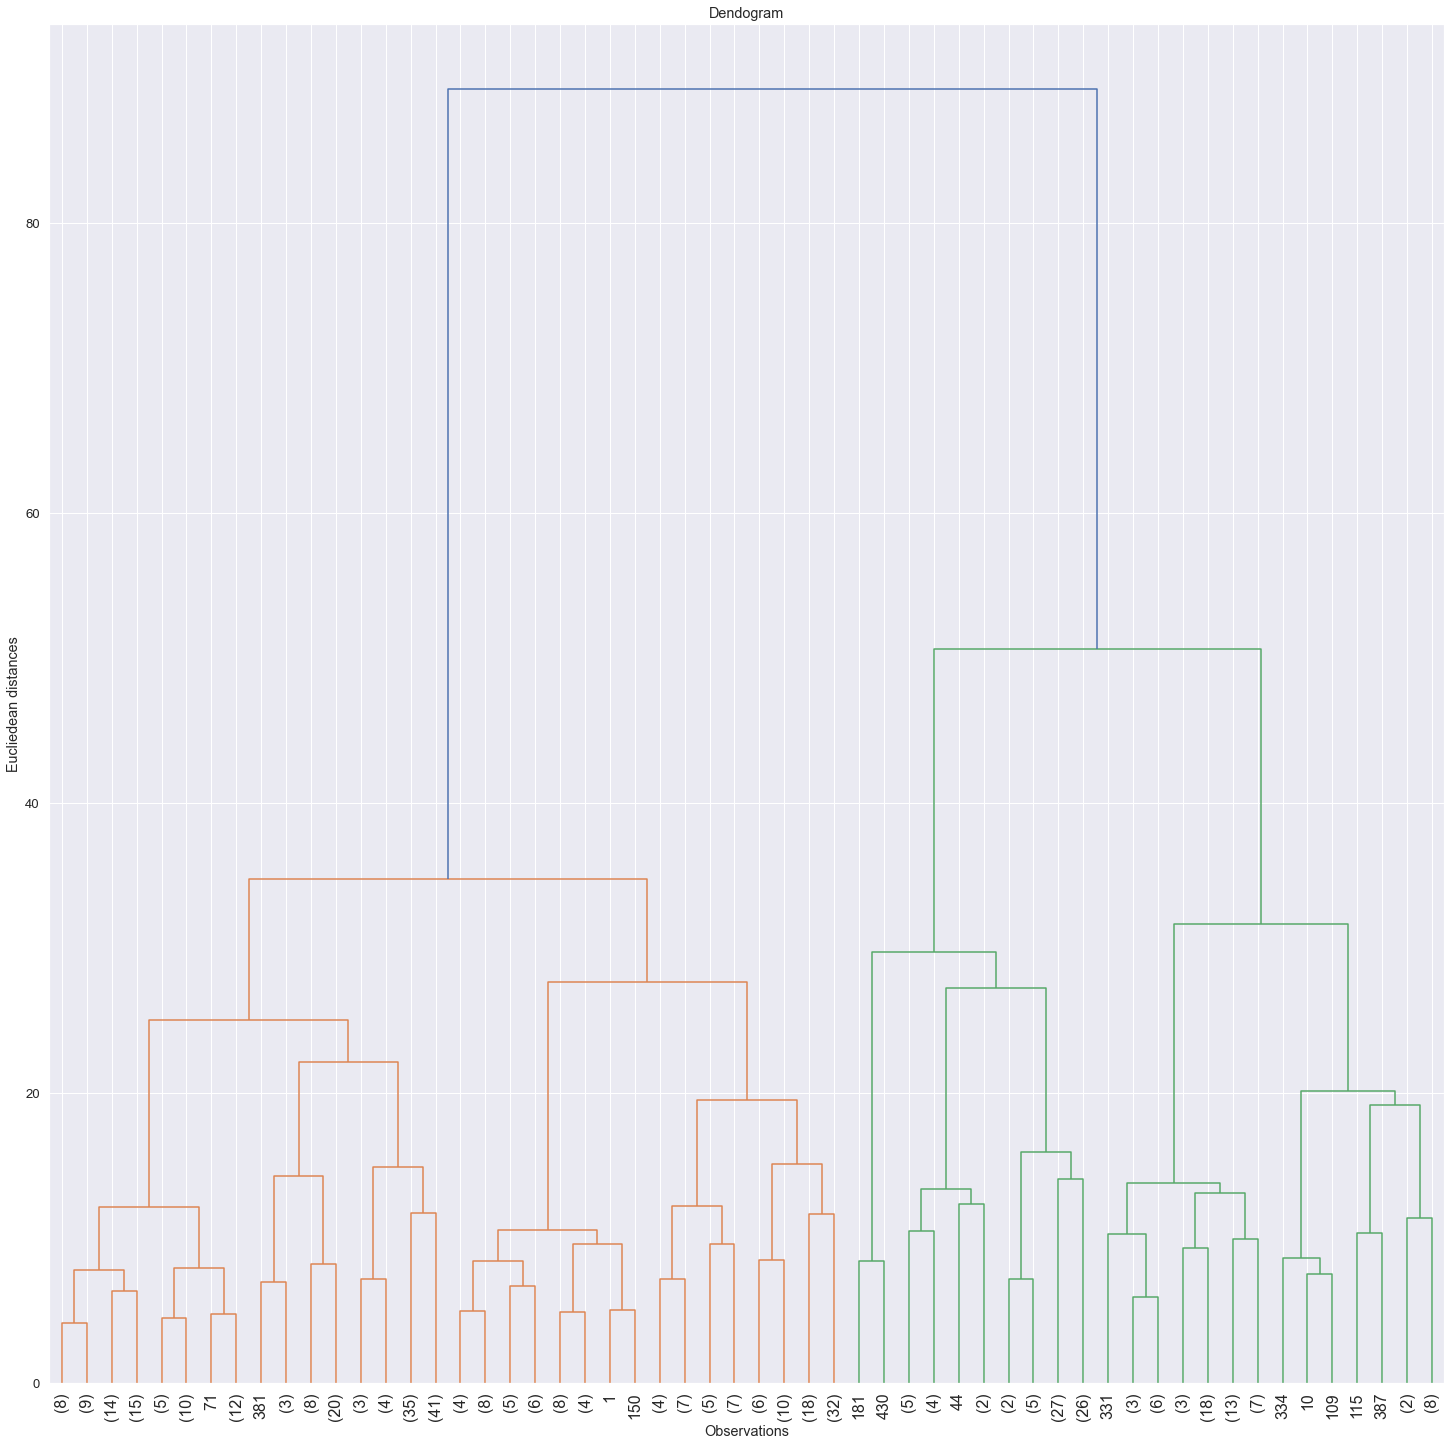

In [20]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X_train_scaled,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [21]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [22]:
y_hc = hc.fit_predict(X_test_scaled)

In [23]:
y_hc

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [24]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [25]:
y

,Cluster
0,0
1,1
2,0
3,1
4,1
...,...
109,1
110,0
111,0
112,0


In [26]:
y['Cluster'].unique()

array([0, 1], dtype=int64)

In [27]:
y['Cluster'].value_counts()

1    76
0    38
Name: Cluster, dtype: int64

In [28]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [29]:
X_test_df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
0,18.77,21.43,122.90,1092.00,0.09,0.14,0.11,0.06,0.20,0.06,0.64,1.53,4.37,88.25,0.01,0.04,0.04,0.02,0.02,0.00,24.54,34.37,161.10,1873.00,0.15,0.48,0.46,0.20,0.37,0.10
1,13.77,22.29,90.63,588.90,0.12,0.13,0.14,0.07,0.18,0.07,0.62,2.11,4.91,49.70,0.01,0.03,0.05,0.02,0.03,0.00,16.39,34.01,111.60,806.90,0.17,0.31,0.38,0.17,0.31,0.09
2,11.80,16.58,78.99,432.00,0.11,0.17,0.17,0.07,0.27,0.07,0.32,1.43,2.28,24.72,0.01,0.04,0.05,0.02,0.06,0.00,13.74,26.38,91.93,591.70,0.14,0.41,0.45,0.19,0.58,0.10
3,12.25,22.44,78.18,466.50,0.08,0.05,0.02,0.01,0.15,0.06,0.22,1.14,1.58,18.04,0.01,0.01,0.01,0.00,0.02,0.00,14.17,31.99,92.74,622.90,0.13,0.18,0.12,0.06,0.31,0.08
4,9.88,19.40,63.95,298.30,0.10,0.10,0.06,0.03,0.19,0.06,0.18,1.22,1.53,11.77,0.01,0.02,0.03,0.01,0.02,0.00,10.76,26.83,72.22,361.20,0.16,0.23,0.26,0.10,0.26,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,12.05,22.72,78.75,447.80,0.07,0.11,0.08,0.03,0.12,0.07,0.12,1.43,1.78,9.55,0.01,0.05,0.04,0.02,0.02,0.01,12.57,28.71,87.36,488.40,0.09,0.32,0.29,0.11,0.22,0.09
110,20.20,26.83,133.70,1234.00,0.10,0.17,0.16,0.13,0.19,0.06,0.98,1.89,7.13,103.60,0.01,0.05,0.06,0.03,0.04,0.00,24.19,33.81,160.00,1671.00,0.13,0.34,0.37,0.22,0.33,0.08
111,19.79,25.12,130.40,1192.00,0.10,0.16,0.25,0.11,0.22,0.06,0.50,1.20,2.77,63.33,0.01,0.03,0.05,0.01,0.02,0.00,22.63,33.58,148.70,1589.00,0.13,0.39,0.57,0.17,0.33,0.08
112,25.73,17.46,174.20,2010.00,0.11,0.24,0.34,0.19,0.20,0.06,0.99,0.85,7.22,153.10,0.01,0.04,0.04,0.02,0.02,0.00,33.13,23.58,229.30,3234.00,0.15,0.59,0.65,0.28,0.37,0.09


In [30]:
newdf = pd.concat([X_test_df,y],axis=1)

In [31]:
newdf

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Cluster
0,18.77,21.43,122.90,1092.00,0.09,0.14,0.11,0.06,0.20,0.06,0.64,1.53,4.37,88.25,0.01,0.04,0.04,0.02,0.02,0.00,24.54,34.37,161.10,1873.00,0.15,0.48,0.46,0.20,0.37,0.10,0
1,13.77,22.29,90.63,588.90,0.12,0.13,0.14,0.07,0.18,0.07,0.62,2.11,4.91,49.70,0.01,0.03,0.05,0.02,0.03,0.00,16.39,34.01,111.60,806.90,0.17,0.31,0.38,0.17,0.31,0.09,1
2,11.80,16.58,78.99,432.00,0.11,0.17,0.17,0.07,0.27,0.07,0.32,1.43,2.28,24.72,0.01,0.04,0.05,0.02,0.06,0.00,13.74,26.38,91.93,591.70,0.14,0.41,0.45,0.19,0.58,0.10,0
3,12.25,22.44,78.18,466.50,0.08,0.05,0.02,0.01,0.15,0.06,0.22,1.14,1.58,18.04,0.01,0.01,0.01,0.00,0.02,0.00,14.17,31.99,92.74,622.90,0.13,0.18,0.12,0.06,0.31,0.08,1
4,9.88,19.40,63.95,298.30,0.10,0.10,0.06,0.03,0.19,0.06,0.18,1.22,1.53,11.77,0.01,0.02,0.03,0.01,0.02,0.00,10.76,26.83,72.22,361.20,0.16,0.23,0.26,0.10,0.26,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,12.05,22.72,78.75,447.80,0.07,0.11,0.08,0.03,0.12,0.07,0.12,1.43,1.78,9.55,0.01,0.05,0.04,0.02,0.02,0.01,12.57,28.71,87.36,488.40,0.09,0.32,0.29,0.11,0.22,0.09,1
110,20.20,26.83,133.70,1234.00,0.10,0.17,0.16,0.13,0.19,0.06,0.98,1.89,7.13,103.60,0.01,0.05,0.06,0.03,0.04,0.00,24.19,33.81,160.00,1671.00,0.13,0.34,0.37,0.22,0.33,0.08,0
111,19.79,25.12,130.40,1192.00,0.10,0.16,0.25,0.11,0.22,0.06,0.50,1.20,2.77,63.33,0.01,0.03,0.05,0.01,0.02,0.00,22.63,33.58,148.70,1589.00,0.13,0.39,0.57,0.17,0.33,0.08,0
112,25.73,17.46,174.20,2010.00,0.11,0.24,0.34,0.19,0.20,0.06,0.99,0.85,7.22,153.10,0.01,0.04,0.04,0.02,0.02,0.00,33.13,23.58,229.30,3234.00,0.15,0.59,0.65,0.28,0.37,0.09,0


In [32]:
meandf = newdf.groupby(by='Cluster').mean()

In [33]:
meandf

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.67,22.15,117.01,1001.86,0.10,0.16,0.17,0.09,0.20,0.06,0.63,1.39,4.50,72.12,0.01,0.04,0.05,0.02,0.02,0.01,21.01,29.62,140.92,1399.26,0.14,0.40,0.46,0.18,0.34,0.09
1,12.16,18.34,78.13,466.01,0.09,0.08,0.04,0.03,0.17,0.06,0.29,1.28,2.08,22.28,0.01,0.02,0.02,0.01,0.02,0.00,13.49,24.55,87.75,572.39,0.13,0.18,0.16,0.08,0.28,0.08


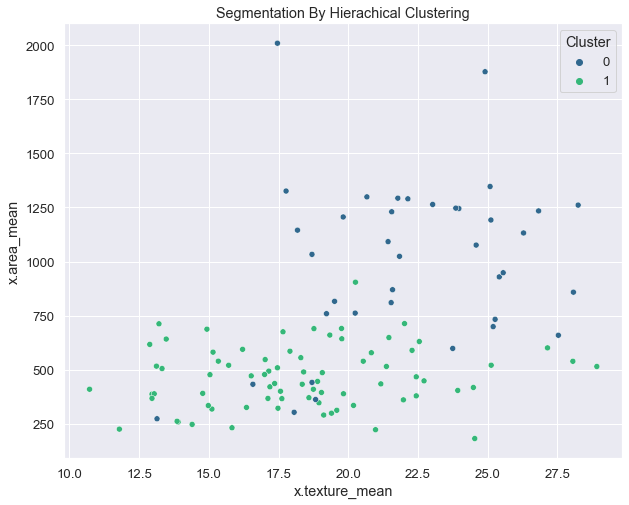

In [34]:
x_axis = newdf["x.texture_mean"]
y_axis = newdf["x.area_mean"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation By Hierachical Clustering')
plt.show()

## K-Means Clustering

q10 - the predict_kmeans() takes two arguments, the matrix and k-means object

q10a - perform k-means on the train set and predict the overall accuracy

### Manual K-Means

In [35]:
model = KMeans(n_clusters=2, random_state=0)

In [36]:
model.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=0)

In [37]:
labels = model.labels_
labels

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [38]:
X_train

array([[ 13.87   ,  20.7    ,  89.77   , ...,   0.06845,   0.2249 ,
          0.08492],
       [ 17.95   ,  20.01   , 114.2    , ...,   0.1185 ,   0.4882 ,
          0.06111],
       [ 14.78   ,  23.94   ,  97.4    , ...,   0.1614 ,   0.3321 ,
          0.08911],
       ...,
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       [ 11.66   ,  17.07   ,  73.7    , ...,   0.04262,   0.2731 ,
          0.06825],
       [ 24.63   ,  21.6    , 165.5    , ...,   0.2475 ,   0.3157 ,
          0.09671]])

In [39]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [40]:
X_train_df["Labels"] = model.labels_

In [41]:
X_train_df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Labels
0,13.87,20.70,89.77,584.80,0.10,0.10,0.04,0.02,0.16,0.07,0.27,1.05,2.08,23.12,0.01,0.02,0.03,0.01,0.01,0.00,15.05,24.75,99.17,688.60,0.13,0.20,0.14,0.07,0.22,0.08,0
1,17.95,20.01,114.20,982.00,0.08,0.07,0.07,0.06,0.21,0.05,0.55,1.21,3.36,54.04,0.00,0.01,0.02,0.01,0.05,0.00,20.58,27.83,129.20,1261.00,0.11,0.12,0.22,0.12,0.49,0.06,0
2,14.78,23.94,97.40,668.30,0.12,0.15,0.13,0.09,0.20,0.07,0.36,1.28,2.45,35.24,0.01,0.02,0.02,0.01,0.02,0.00,17.31,33.39,114.60,925.10,0.16,0.34,0.30,0.16,0.33,0.09,1
3,12.23,19.56,78.54,461.00,0.10,0.08,0.04,0.04,0.20,0.06,0.35,1.33,2.31,27.24,0.01,0.02,0.01,0.01,0.02,0.00,14.44,28.36,92.15,638.40,0.14,0.20,0.14,0.11,0.27,0.08,0
4,20.31,27.06,132.90,1288.00,0.10,0.11,0.15,0.09,0.18,0.06,0.40,1.03,2.59,52.34,0.01,0.02,0.02,0.01,0.01,0.00,24.33,39.16,162.30,1844.00,0.15,0.29,0.38,0.17,0.32,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,13.24,20.13,86.87,542.90,0.08,0.12,0.10,0.03,0.16,0.06,0.28,0.81,3.37,23.81,0.00,0.07,0.08,0.01,0.02,0.01,15.44,25.50,115.00,733.50,0.12,0.56,0.66,0.14,0.28,0.12,1
451,11.94,18.24,75.71,437.60,0.08,0.05,0.02,0.01,0.19,0.06,0.23,0.63,1.52,17.47,0.01,0.01,0.01,0.01,0.02,0.00,13.10,21.33,83.67,527.20,0.11,0.09,0.09,0.06,0.28,0.07,0
452,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,1
453,11.66,17.07,73.70,421.00,0.08,0.04,0.01,0.01,0.17,0.06,0.35,0.67,2.23,26.03,0.01,0.01,0.01,0.01,0.02,0.00,13.28,19.74,83.61,542.50,0.10,0.06,0.03,0.04,0.27,0.07,0


In [42]:
centroids = model.cluster_centers_
centroids

array([[-0.4836118 , -0.22216286, -0.50209487, -0.47635265, -0.31804974,
        -0.52744616, -0.58549685, -0.59488221, -0.31209926, -0.14499055,
        -0.42330574, -0.00454827, -0.42820746, -0.39053737, -0.00238342,
        -0.35804596, -0.32550202, -0.39478456, -0.05363438, -0.22655315,
        -0.51782251, -0.23535336, -0.53325625, -0.49745951, -0.32735628,
        -0.48917791, -0.54011352, -0.58464012, -0.30311216, -0.33759431],
       [ 0.92692261,  0.42581214,  0.9623485 ,  0.91300925,  0.60959534,
         1.01093848,  1.1222023 ,  1.1401909 ,  0.59819025,  0.27789855,
         0.81133601,  0.00871752,  0.82073097,  0.74852996,  0.00456822,
         0.68625475,  0.62387888,  0.75667041,  0.10279923,  0.43422686,
         0.99249315,  0.45109395,  1.02207449,  0.95346406,  0.62743286,
         0.937591  ,  1.03521757,  1.12056024,  0.58096498,  0.64705575]])

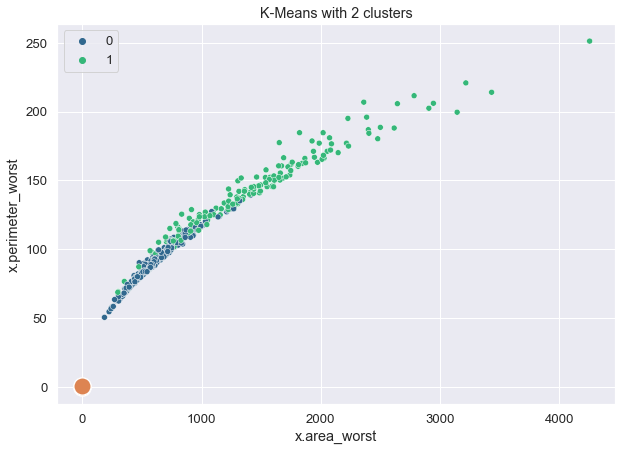

In [43]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=X_train_df["x.area_worst"], y=X_train_df["x.perimeter_worst"], hue=X_train_df["Labels"], palette="viridis")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1], s=300)
plt.title("K-Means with 2 clusters")

plt.show()

### Using Elbow Method

In [44]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

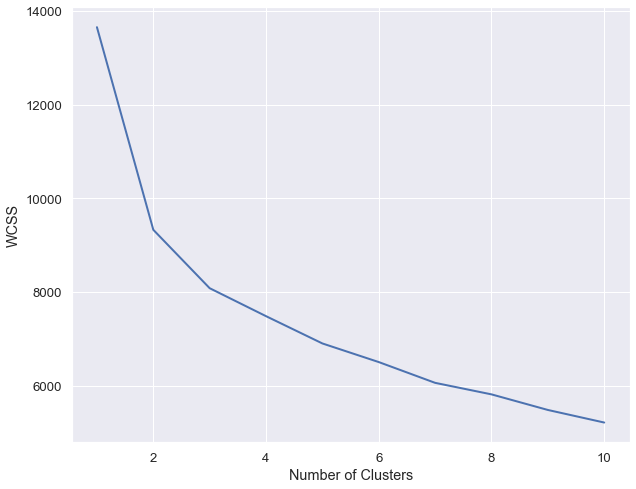

In [45]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [46]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0)

In [47]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=0)

q6 - perform principal component analysis

q6a - what proportion of variance is explained by the first component

q6b - how many PCs required to explain 90%

q7 - plot the first two PCs, with color representing tumor

q8 - make a boxplot of the first 10 pcs, grouped by tumor type

## Principal Component Analysis

In [48]:
pca2 = PCA(n_components=2)

In [49]:
X_train_2 = pca2.fit_transform(X_train_scaled)

In [50]:
X_test_2 = pca2.transform(X_test_scaled)

In [51]:
X_train_2[:5]

array([[-1.67284669, -0.18899097],
       [ 0.82635432, -2.22052155],
       [ 1.83836574,  0.73930748],
       [-1.46858589,  0.14502706],
       [ 3.38216733, -3.36731147]])

In [52]:
X_test_2[:5]

array([[ 4.63823676, -0.90209803],
       [ 2.45889835,  2.34099162],
       [ 2.4283297 ,  4.9516385 ],
       [-2.89837403, -0.95555738],
       [-2.10049825,  1.87603088]])

In [53]:
graph = pd.DataFrame(X_train_2, columns=['A','B'])
graph

,A,B
0,-1.67,-0.19
1,0.83,-2.22
2,1.84,0.74
3,-1.47,0.15
4,3.38,-3.37
...,...,...
450,1.32,2.17
451,-3.44,-0.45
452,5.72,-1.01
453,-4.05,-1.31


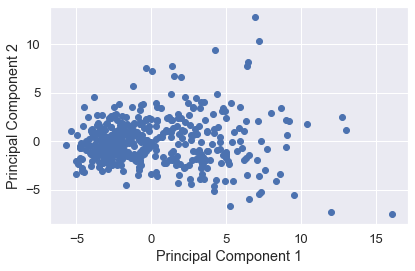

In [54]:
plt.scatter(x=graph.A,y=graph.B)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("")
#plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [55]:
pca2.explained_variance_

array([13.15454039,  5.80868268])